# Load Libraries & Functions

In [1]:
import os
path = os.getcwd() + '\\'
igai_initialize = path + 'IGAI_Initialize.ipynb'

%run $igai_initialize

Libraries and functions loaded correctly 2021-01-25 19:18:15.669272


# Load Data

In [2]:
users = pd.read_csv(users_file)
relations = pd.read_csv(relations_file)
vipuserstrk = pd.read_csv(vipuserstrk_file)

In [18]:
username = 'roma.ba'
img_url = users[users.username == username].profile_pic_url.iloc[0]
Image(url= img_url,  width=300, height=300)

In [19]:
kpi = "followers"
dft = vipuserstrk[vipuserstrk.username == username][["inserted_time", kpi]].sort_values(by=['inserted_time'], ascending = False)
dft["date"] = dft['inserted_time'].apply(lambda x: datetime.datetime.strptime(x[0:10], '%Y-%m-%d'))
dft = dft[["date", kpi]]
dft = dft.drop_duplicates(subset=['date'], keep='first')
dft = dft.sort_values(by=['date'], ascending = True)
dft

,date,followers
19,2020-11-27,62826
104,2021-01-15,63250
166,2021-01-16,63254
190,2021-01-17,63227
241,2021-01-20,63133
266,2021-01-21,63130
291,2021-01-22,63112
579,2021-01-23,63109
710,2021-01-24,63071
1080,2021-01-25,63071


(array([18597., 18604., 18611., 18618., 18628., 18635., 18642., 18649.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

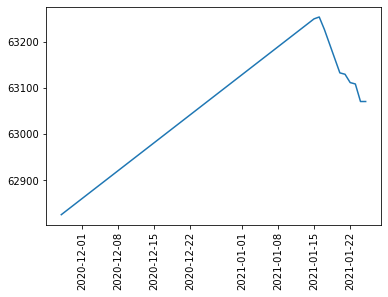

In [20]:
plt.plot(dft['date'], dft[kpi])
plt.xticks(rotation=90)


In [49]:
users[users.username == username].T


,21
userid,-1913920944
username,rebolbear
full_name,Rebol
profile_pic_url,https://instagram.fbcn5-1.fna.fbcdn.net/v/t51....
is_private,True
is_verified,False
last_update_time_basic,2021-01-22 18:19:55.113712
is_business_account,False
posts,51
followers,4185


In [62]:
user_trk = vipuserstrk[vipuserstrk.username == username]


# Extract account's Followers and Followed

In [ ]:
account = 'rebolbear'

In [60]:
user_rel = relations[relations.username == account]["followed_by_username"]
user_rel.to_csv(path + "followers_of_" + account , mode='w', header=True, index = False) #create

In [59]:
user_rel = relations[relations.followed_by_username == account]["username"]
user_rel.to_csv(path + "followed_by_" + account , mode='w', header=True, index = False) #create

# Extract username's Followers that don't follow back

In [61]:
account = 'rebolbear'
relations = pd.read_csv(relations_file)
fwr = list(relations[(relations.username == account) & (relations.status == "following")]["followed_by_username"])
fwd = list(relations[(relations.followed_by_username == account) & (relations.status == "following")]["username"])
notfollowers = [item for item in fwd if item not in fwr]
notfollowers = pd.DataFrame(notfollowers, columns=['notfollowers'])
notfollowers.to_csv(path + "not_followers_" + account , mode='w', header=True, index = False) #create

In [ ]:
#how to show only output in jupyter notebooks
#https://www.youtube.com/watch?v=rJsWJMBksK0

#interactive reports (está guay)
#https://towardsdatascience.com/interactive-reporting-in-jupyter-notebook-92a4fa90c09a